In [117]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

# sklearn models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [118]:
path = os.getcwd() + '\\TEST_CSV.csv'
data = pd.read_csv(path, header=0)
data.head()

# Create dataframe using relevant colums
x = data[["Datetime","Open_BTC","High_BTC","Low_BTC","Close_BTC","Volume_BTC","Dividends_BTC","Stock Splits_BTC",
          "Open_diff_BTC","High_diff_BTC","Close_diff_BTC","Volume_diff_BTC","Open_VET","High_VET","Low_VET","Close_VET",
          "Volume_VET","Dividends_VET","Stock Splits_VET","Open_diff_VET","High_diff_VET","Close_diff_VET","Volume_diff_VET"]]

# Create targets using next timestep
y_VET = []
for i in range(0, len(data.index) - 1):
    y_VET.append(x.iloc[i + 1]["Close_VET"])

# Assign it to np array
y_VET = np.array([y_VET])

# Remove last row since we can't have target for last row
x = x[:-1]

x.head()

,Datetime,Open_BTC,High_BTC,Low_BTC,Close_BTC,Volume_BTC,Dividends_BTC,Stock Splits_BTC,Open_diff_BTC,High_diff_BTC,...,High_VET,Low_VET,Close_VET,Volume_VET,Dividends_VET,Stock Splits_VET,Open_diff_VET,High_diff_VET,Close_diff_VET,Volume_diff_VET
0,2021-10-23 20:28:00+01:00,61067.722656,61067.722656,61067.722656,61067.722656,0,0,0,0.000000,0.000000,...,0.134717,0.134717,0.134717,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,2021-10-23 20:29:00+01:00,61043.609375,61043.609375,61043.609375,61043.609375,0,0,0,-24.113281,-24.113281,...,0.134687,0.134687,0.134687,7680.0,0.0,0.0,-0.000030,-0.000030,-0.000030,7680.0
2,2021-10-23 20:30:00+01:00,61051.675781,61051.675781,61051.675781,61051.675781,0,0,0,8.066406,8.066406,...,0.134875,0.134875,0.134875,231744.0,0.0,0.0,0.000188,0.000188,0.000188,224064.0
3,2021-10-23 20:31:00+01:00,61062.613281,61062.613281,61062.613281,61062.613281,0,0,0,10.937500,10.937500,...,0.134967,0.134967,0.134967,111488.0,0.0,0.0,0.000091,0.000091,0.000091,-120256.0
4,2021-10-23 20:32:00+01:00,61024.718750,61024.718750,61024.718750,61024.718750,0,0,0,-37.894531,-37.894531,...,0.134994,0.134994,0.134994,0.0,0.0,0.0,0.000027,0.000027,0.000027,-111488.0


In [119]:
# Transforms datetime into incremental values
le = LabelEncoder()
x["Datetime"] = le.fit_transform(x["Datetime"])

# Consider removing datetime from data
# x.drop(["Datetime"], inplace=True, axis=1)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, data["Green_VET"][:-1], test_size=0.25, random_state=0, shuffle=False)

## Logistic Regression

In [121]:
# Logistic Regression 
lg = LogisticRegression(random_state=0, max_iter=1000000)

# Fit with training data
lg.fit(X_train,y_train)
predicted = lg.predict(X_test)

              precision    recall  f1-score   support

       False       0.60      0.88      0.71      1265
        True       0.76      0.40      0.53      1234

    accuracy                           0.64      2499
   macro avg       0.68      0.64      0.62      2499
weighted avg       0.68      0.64      0.62      2499



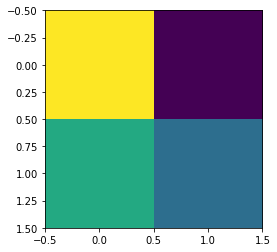

In [122]:
# Confusion matrix to check predicted
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix = np.array(conf_matrix)
conf_matrix = pd.DataFrame(data=conf_matrix)

plt.imshow(conf_matrix)

print(classification_report(y_test, predicted))

Text(0, 0.5, 'Precision')

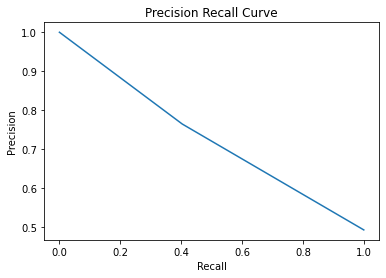

In [123]:
# Precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted)
plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

## Polynomial Regression

In [124]:
# WIP Polynomial Regression as another way to model our data
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)
X_test_poly = poly.fit_transform(X_test)

lg = LinearRegression()

# Fit
lg.fit(X_poly, y_VET.reshape(-1, 1))

# Obtain coefficients
# print(lg.coef_)

# Predict
predictions_poly = lg.predict(X_test_poly)
print(predictions_poly)

[[0.13279636]
 [0.13293559]
 [0.13286523]
 ...
 [0.13164046]
 [0.13149837]
 [0.13151539]]


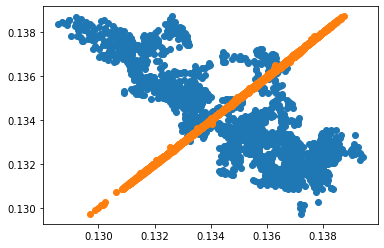

In [125]:
plt.scatter(y_VET.reshape(-1, 1)[:2499], predictions_poly)

plt.scatter(X_test["Close_VET"], predictions_poly)